# Emotion Detector

In this notebook, one would find the emotion detector code from the NLP with transformers. This is covered in **Chapter 2 - Text Classification**.

In [12]:
%pip install datasets huggingface-hub tqdm ipywidgets matplotlib -q


[notice] A new release of pip is available: 23.2.1 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. Exploring the HF datasets 

**Note**: The list_datasets function is in the huggingface_hub library instead of the datasets library. 

In [14]:
# from huggingface_hub import list_datasets

# all_datasets = list(list_datasets(full=False))
# print(f"Number of datasets available in the Hub: {len(all_datasets)}")
# print("Some example datasets:", all_datasets[:10])

In [15]:
from datasets import load_dataset

emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [16]:
train_emotion_ds = emotions["train"]
print(f"Number of training examples: {len(train_emotion_ds)}")
print(f"Example training example: {train_emotion_ds[0]}")

Number of training examples: 16000
Example training example: {'text': 'i didnt feel humiliated', 'label': 0}


In [17]:
# Display the datatype under the hood using the features attribute in Dataset
print(train_emotion_ds.features)

{'text': Value('string'), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}


### 1.1 From Datasets to Dataframe

In [18]:
# Convert to pandas DataFrame for easier visualization
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
display(df.head())

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [19]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row["label"])

df["label_name"] = df.apply(label_int2str, axis=1)
display(df.head())

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## 1.2 Looking at class distribution

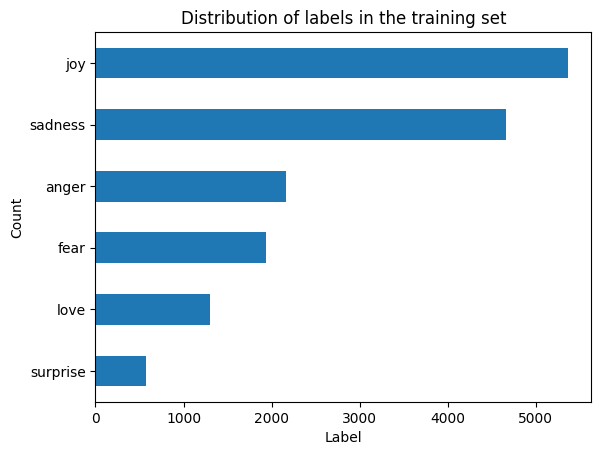

In [21]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Distribution of labels in the training set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## 1.3 How long is our tweets

In [22]:
df['Words_per_tweet'] = df['text'].str.split().apply(len)
display(df.head())

,text,label,label_name,Words_per_tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


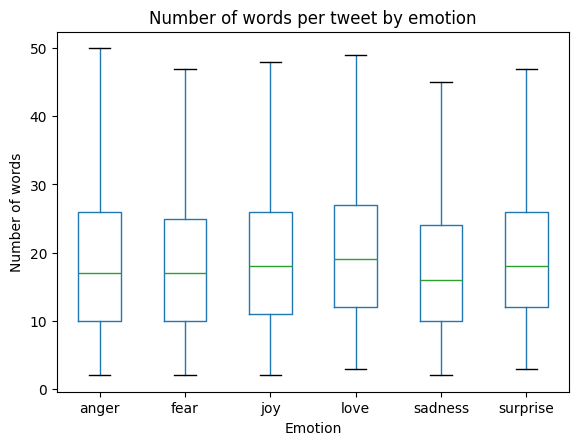

In [24]:
# Display this in boxplots.
df.boxplot(column='Words_per_tweet', by='label_name', grid=False, showfliers=False)
plt.title("Number of words per tweet by emotion")
plt.suptitle("")
plt.xlabel("Emotion")
plt.ylabel("Number of words")
plt.show()

In [25]:
emotions.reset_format() # Reset to default format as we do not want dataframes anymore